In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Dataset and Preprocess it

In [6]:
!ls '/content/train.csv'

/content/train.csv


In [14]:
df = pd.read_csv('/content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [15]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No null value 

In [16]:
df.duplicated().sum()

0

No duplicated value

In [17]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Q.6 : Feature Engineering \
a. Binning on Battery Power Feature

In [18]:
min_value = df['battery_power'].min()
max_value = df['battery_power'].max()
print(min_value)
print(max_value)

501
1998


In [26]:
bins = np.linspace(min_value , max_value , 4)
bins

array([ 501., 1000., 1499., 1998.])

In [27]:
labels = ['Low' , 'Medium' , 'high']

In [28]:
df['bins'] = pd.cut(df['battery_power'], bins=bins , labels=labels , include_lowest=True)

(array([697., 641., 662.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

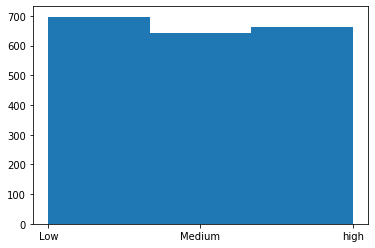

In [32]:
plt.hist(df['bins'], bins=3)

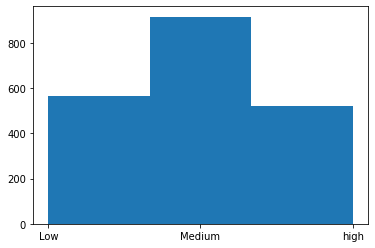

In [38]:
bins = [500, 900, 1600, 2000]
df['bin_cut_manual'] = pd.cut(df['battery_power'], bins=bins , labels=labels , include_lowest=True)
plt.hist(df['bin_cut_manual'], bins=3)
plt.show()

Q.8 : What is Bootstrapping?\
Ans : In statistics and Machine Learning, Bootstrapping is a resampling technique that involves repeatedly drawing samples from our source data with replacement (It means that the same data point may be included in our resampled dataset multiple times) , often to estimate a population parameter.[Ref. carpentries-incubator.github.io] \
Q.cont : what is the difference between it and Cross Validation? \
Ans : Cross Validation splits the available dataset to create multiple datasets, and bootstrapping method uses the original dataset to create multiple datasets after resampling with replacement.[Ref. datascience.stackexchange.com]\
Q.cont : When we use bootstrapping?\
 A primary use of bootstrapping is to estimate the confidence interval of the population mean. for instance, a 80% confidence interval means that we are 80% confident that the mean lies within a particular range. [Ref. towardsdatascience.com]


Q.9 : What is 5×2 Cross Validation? \
Ans : There is a particular type of nested cross validation that is also known as 5×2 Cross Validation which the 2 refers to the inner loop for hyper parameter tuning and the 5 refers to the outer loop for unbiased model performance estimation. Shortly, It refers to a 5 repetition of a 2-fold.(Do a 2-fold [50/50 split between train and test] and repeat it 4 more times.) 


Extra Q.2 : how to use Statistical Significance Tests for Comparing Models?\
Comparing machine learning methods and selecting a final model is a common operation in applied machine learning.

Models are commonly evaluated using resampling methods like k-fold cross-validation from which mean skill scores are calculated and compared directly. Although simple, this approach can be misleading as it is hard to know whether the difference between mean skill scores is real or the result of a statistical fluke.

Statistical significance tests are designed to address this problem and quantify the likelihood of the samples of skill scores being observed given the assumption that they were drawn from the same distribution. If this assumption, or null hypothesis, is rejected, it suggests that the difference in skill scores is statistically significant.

So A big part of applied machine learning is model selection.

We can describe this in its simplest form:

Given the evaluation of two machine learning methods on a dataset, which model do you choose?

You choose the model with the best skill.

That is, the model whose estimated skill when making predictions on unseen data is best. This might be maximum accuracy or minimum error in the case of classification and regression problems respectively.

The challenge with selecting the model with the best skill is determining how much can you trust the estimated skill of each model. More generally:

Is the difference in skill between two machine learning models real, or due to a statistical chance?

We can use statistical hypothesis testing to address this question.

Generally, a statistical hypothesis test for comparing samples quantifies how likely it is to observe two data samples given the assumption that the samples have the same distribution.

The assumption of a statistical test is called the null hypothesis and we can calculate statistical measures and interpret them in order to decide whether or not to accept or reject the null hypothesis.

In the case of selecting models based on their estimated skill, we are interested to know whether there is a real or statistically significant difference between the two models.

If the result of the test suggests that there is insufficient evidence to reject the null hypothesis, then any observed difference in model skill is likely due to statistical chance.
If the result of the test suggests that there is sufficient evidence to reject the null hypothesis, then any observed difference in model skill is likely due to a difference in the models.
The results of the test are probabilistic, meaning, it is possible to correctly interpret the result and for the result to be wrong with a type I or type II error. Briefly, a false positive or false negative finding.

Comparing machine learning models via statistical significance tests imposes some expectations that in turn will impact the types of statistical tests that can be used; for example:

Skill Estimate. A specific measure of model skill must be chosen. This could be classification accuracy (a proportion) or mean absolute error (summary statistic) which will limit the type of tests that can be used.

Repeated Estimates. A sample of skill scores is required in order to calculate statistics. The repeated training and testing of a given model on the same or different data will impact the type of test that can be used.

Distribution of Estimates. The sample of skill score estimates will have a distribution, perhaps Gaussian or perhaps not. This will determine whether parametric or nonparametric tests can be used.

Central Tendency. Model skill will often be described and compared using a summary statistic such as a mean or median, depending on the distribution of skill scores. The test may or may not take this directly into account.

The results of a statistical test are often a test statistic and a p-value, both of which can be interpreted and used in the presentation of the results in order to quantify the level of confidence or significance in the difference between models. This allows stronger claims to be made as part of model selection than not using statistical hypothesis tests.

Given that using statistical hypothesis tests seems desirable as part of model selection, how do you choose a test that is suitable for your specific use case?

Let’s look at a common example for evaluating and comparing classifiers for a balanced binary classification problem.

It is common practice to evaluate classification methods using classification accuracy, to evaluate each model using 10-fold cross-validation, to assume a Gaussian distribution for the sample of 10 model skill estimates, and to use the mean of the sample as a summary of the model’s skill.

We could require that each classifier evaluated using this procedure be evaluated on exactly the same splits of the dataset via 10-fold cross-validation. This would give samples of matched paired measures between two classifiers, matched because each classifier was evaluated on the same 10 test sets.

We could then select and use the paired Student’s t-test to check if the difference in the mean accuracy between the two models is statistically significant, e.g. reject the null hypothesis that assumes that the two samples have the same distribution.

In fact, this is a common way to compare classifiers with perhaps hundreds of published papers using this methodology.

The problem is, a key assumption of the paired Student’s t-test has been violated.

Namely, the observations in each sample are not independent. As part of the k-fold cross-validation procedure, a given observation will be used in the training dataset (k-1) times. This means that the estimated skill scores are dependent, not independent, and in turn that the calculation of the t-statistic in the test will be misleadingly wrong along with any interpretations of the statistic and p-value.

This observation requires a careful understanding of both the resampling method used, in this case k-fold cross-validation, and the expectations of the chosen hypothesis test, in this case the paired Student’s t-test. Without this background, the test appears appropriate, a result will be calculated and interpreted, and everything will look fine.

Unfortunately, selecting an appropriate statistical hypothesis test for model selection in applied machine learning is more challenging than it first appears. Fortunately, there is a growing body of research helping to point out the flaws of the naive approaches, and suggesting corrections and alternate methods.